In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:1'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from representationTrans.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 429.51it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 5867.83it/s]


absolute alignment indicates number: 106 label diff indicates number: 12 confidence diff indicates number: 16 high distance number: 97


In [2]:
from AlignVis.aproximate_ref_generator import ApproximateRefGenerator
aeg = ApproximateRefGenerator(ref_provider=ref_provider, tar_provider=tar_provider, REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH, tar_model=tar_model, ref_model=ref_model,DEVICE=DEVICE)

100%|██████████| 250/250 [00:00<00:00, 8134.42it/s]


In [ ]:
newRep = aeg.generate_representation_by_cka(200, predict_label_diff_indicates, 0, 1000)

In [4]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(newRep,tar_train_data[predict_label_diff_indicates]))

CKA between absolute alignmnet subset is: 0.998171496567099


In [5]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(newRep,ref_train_data[predict_label_diff_indicates]))

CKA between absolute alignmnet subset is: 0.8476445588554957


In [6]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref  predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates])

reference predict res:  [2 3 4 0 3 5 3 3 3 5 5 5]


100%|██████████| 1/1 [00:00<00:00, 2947.51it/s]


adjusetd ref  predict res:  [3 3 5 3 3 5 2 3 3 5 4 3]


100%|██████████| 1/1 [00:00<00:00, 2798.07it/s]

adjusetd ref  predict res:  [5 5 5 3 5 3 9 5 5 3 5 3]
target        predict res:  [5 5 5 3 5 3 9 5 5 3 7 3]


In [6]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref  predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates])

reference predict res:  [2 3 4 0 3 5 3 3 3 5 5 5]


100%|██████████| 1/1 [00:00<00:00, 2399.49it/s]


adjusetd ref  predict res:  [3 3 5 3 3 5 2 3 3 5 4 3]


100%|██████████| 1/1 [00:00<00:00, 2309.64it/s]

adjusetd ref  predict res:  [5 5 5 3 5 3 9 5 5 3 5 3]
target        predict res:  [5 5 5 3 5 3 9 5 5 3 7 3]


In [2]:
X = ref_train_data
Y = tar_train_data

In [23]:
from AlignVis.alignment_metrix_generator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n = alignment_n.align_embeddings_batch(Y,X,8000)

batch_idx 0,iteration 0, loss1 65502392.0 loss2 {tensor(0.7834, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8510, requires_grad=True)}
batch_idx 99,iteration 99, loss1 4598.4423828125 loss2 {tensor(0.5463, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6470, requires_grad=True)}
batch_idx 198,iteration 198, loss1 665.851806640625 loss2 {tensor(0.5476, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5540, requires_grad=True)}
batch_idx 297,iteration 297, loss1 305.3421630859375 loss2 {tensor(0.4892, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4740, requires_grad=True)}
batch_idx 396,iteration 396, loss1 238.3665008544922 loss2 {tensor(0.4376, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4770, requires_grad=True)}
batch_idx 495,iteration 495, loss1 245.61891174316406 loss2 {tensor(0.4075, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4210, requires_grad=True)}
batch_idx 94,iteration 594, loss1 283.23834228515625 loss2 {tensor(0.4498, grad_fn=<AddBackward0>)} neibour_loss {t

In [25]:
S_n = alignment_n.align_embeddings_batch(np.dot(Y,R_n.detach().numpy()),Y,15000)

batch_idx 0,iteration 0, loss1 94688008.0 loss2 {tensor(0.9032, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8730, requires_grad=True)}
batch_idx 99,iteration 99, loss1 1561.931884765625 loss2 {tensor(0.5690, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5910, requires_grad=True)}
batch_idx 198,iteration 198, loss1 268.80511474609375 loss2 {tensor(0.5058, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4700, requires_grad=True)}
batch_idx 297,iteration 297, loss1 184.26922607421875 loss2 {tensor(0.4281, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4070, requires_grad=True)}
batch_idx 396,iteration 396, loss1 126.16576385498047 loss2 {tensor(0.3425, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3730, requires_grad=True)}
batch_idx 495,iteration 495, loss1 152.40867614746094 loss2 {tensor(0.3562, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3870, requires_grad=True)}
batch_idx 94,iteration 594, loss1 164.4747314453125 loss2 {tensor(0.3600, grad_fn=<AddBackward0>)} neibour_lo

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 7379.09it/s]


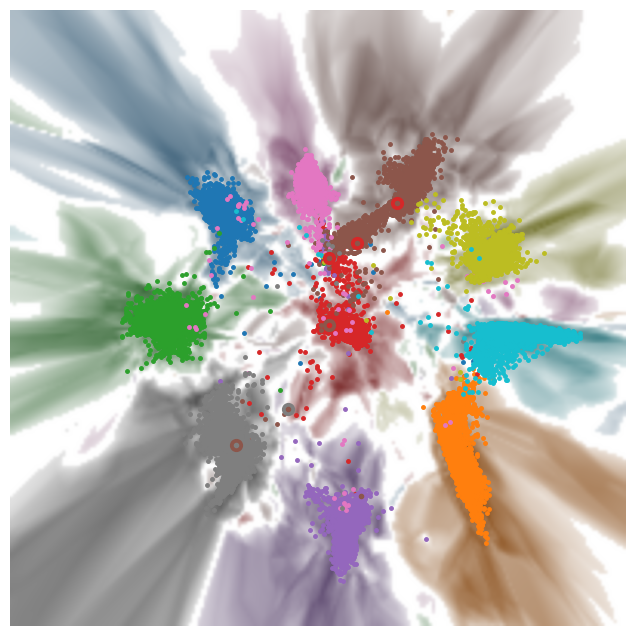

In [26]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, S_n.detach().numpy(),I, np.dot(tar_train_data,R_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 6081.73it/s]


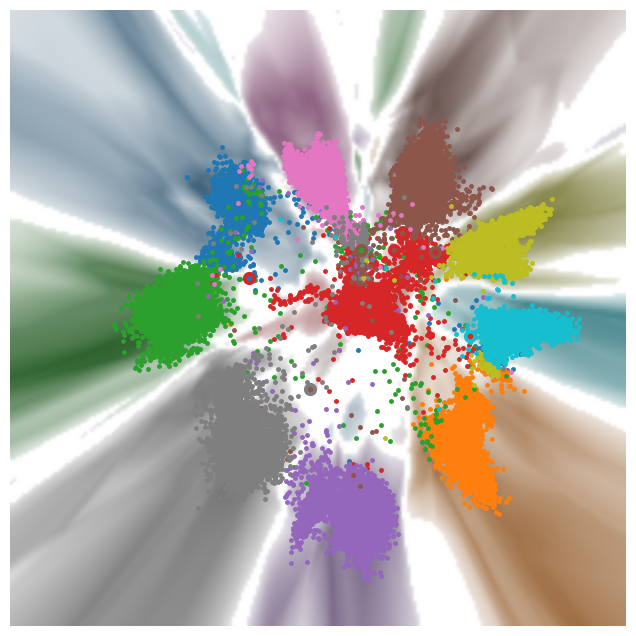

In [21]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=CLEAN_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, R_n.detach().numpy(),I, np.dot(ref_train_data,S_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))